In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('../data/rankings.tab',sep='\t')
df.head()

,location_id,year,sitc_eci,hs_eci,growth_proj,sitc_eci_rank,hs_eci_rank,code
0,2,1995,-2.001223,-2.148367,NaN,127.0,217.0,AGO
1,2,1996,-2.120867,-2.144461,NaN,129.0,215.0,AGO
2,2,1997,-1.800330,-1.424870,NaN,127.0,204.0,AGO
3,2,1998,-1.756738,-1.650229,NaN,127.0,206.0,AGO
4,2,1999,-1.703370,-1.384564,NaN,124.0,202.0,AGO


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3059 entries, 0 to 3058
Data columns (total 8 columns):
location_id      3059 non-null int64
year             3059 non-null int64
sitc_eci         3033 non-null float64
hs_eci           3033 non-null float64
growth_proj      1704 non-null float64
sitc_eci_rank    3033 non-null float64
hs_eci_rank      3033 non-null float64
code             3059 non-null object
dtypes: float64(5), int64(2), object(1)
memory usage: 191.3+ KB


### There's a lot of missing data in growth projections. Let's explore...

In [6]:
df.code.nunique() # the are 133 countries in the dataset

133

In [7]:
df[df.growth_proj.isna()].code.nunique() #looks like all countries have null entries, so checking by year

133

In [12]:
df[~df.growth_proj.isna()].year.value_counts() #number of countries with values by year, we have complete data for 2017 

2017    133
2016    124
2014    121
2013    121
2012    121
2011    121
2010    121
2009    121
2008    121
2007    121
2006    121
2005    121
2004    121
2015    116
Name: year, dtype: int64

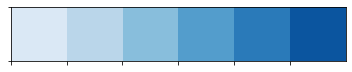

In [9]:
# chose color pallete
current_palette = sns.color_palette('Blues')
sns.palplot(current_palette)

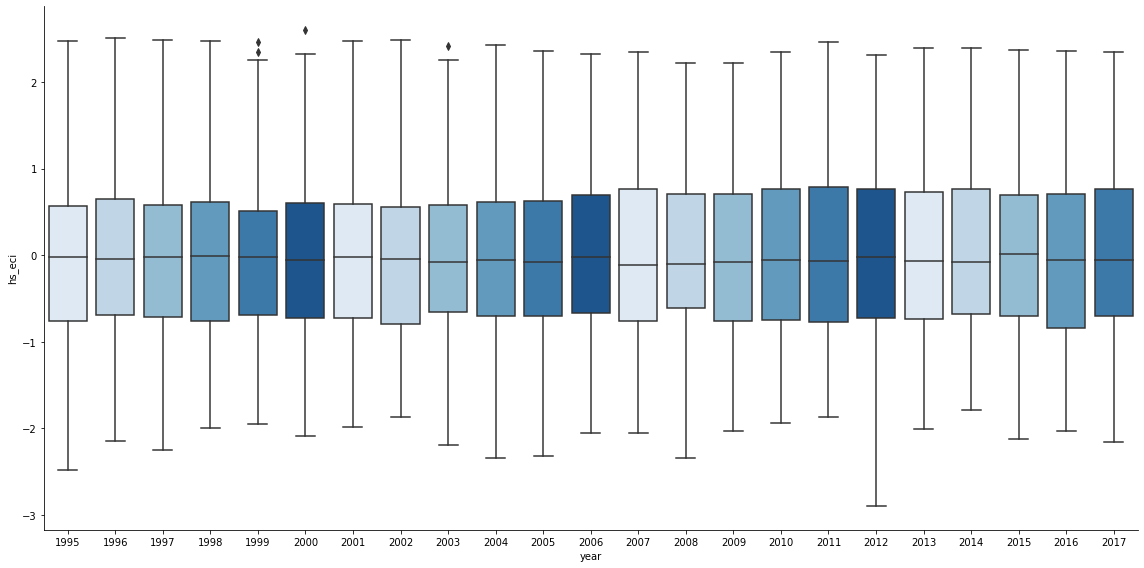

In [10]:
sns.catplot('year','hs_eci', data=df, kind='box', height=8, aspect=2, palette=current_palette)


In [13]:
_2017 = df[df['year']==2017]
_2017.head()

,location_id,year,sitc_eci,hs_eci,growth_proj,sitc_eci_rank,hs_eci_rank,code
22,2,2017,-1.822037,-1.669029,3.28,132.0,227.0,AGO
45,4,2017,-0.288839,-0.352236,3.31,78.0,155.0,ALB
68,7,2017,0.057493,0.247848,0.90,60.0,104.0,ARE
91,8,2017,-0.156561,-0.024405,2.44,72.0,127.0,ARG
114,9,2017,-0.416436,-0.150145,4.17,85.0,138.0,ARM


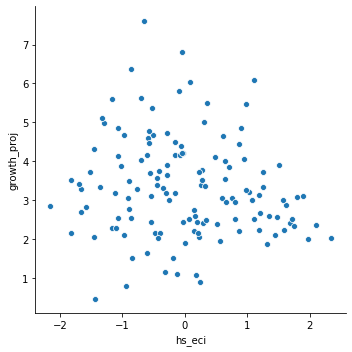

In [14]:
sns.relplot('hs_eci', 'growth_proj', data=_2017, kind='scatter')

### Initial Cluster Model

In [2]:
from sklearn.cluster import KMeans
seed=2

In [19]:
X = _2017[['hs_eci','growth_proj']]
X.head()

,hs_eci,growth_proj
22,-1.669029,3.28
45,-0.352236,3.31
68,0.247848,0.90
91,-0.024405,2.44
114,-0.150145,4.17


In [20]:
km = KMeans(random_state=seed)
km.fit(X)
y_hat = km.predict(X)

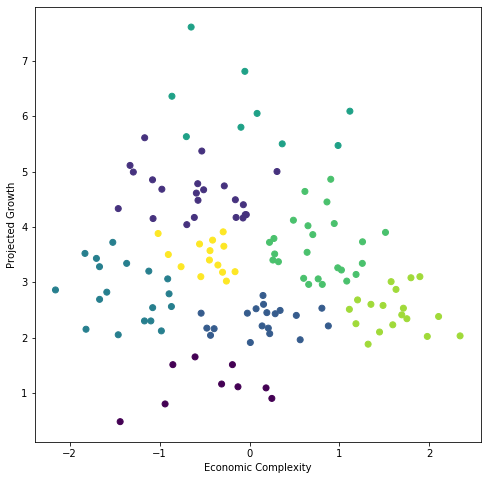

In [21]:
_=plt.figure(figsize=(8,8))
_=plt.scatter(X.hs_eci, X.growth_proj, c=y_hat)
_=plt.xlabel('Economic Complexity')
_=plt.ylabel('Projected Growth')

**Where can we go from here? some ideas we've discussed...**
1. use these clusters as our targets and build models with different independent variables to predict classification. We can try lr, decision tree, knn, and svm. Then combine several of them into a voting model to improve accuracy.
2. use these clusters as one of our explanatory variables to predict a another target. 

**To do...**
1. Find optimal number of clusters
2. Final df by Friday?
3. Split up research on topic and models (Thursday)

In [22]:
loc = pd.read_csv('../data/location.tab',sep='\t') # import country names
loc.head()

,location_id,location_code,location_name_short_en,level,parent_id
0,0,ABW,Aruba,country,356.0
1,1,AFG,Afghanistan,country,353.0
2,2,AGO,Angola,country,352.0
3,3,AIA,Anguilla,country,356.0
4,4,ALB,Albania,country,355.0


# Index of Economic Freedom and Business Outlook

Heritage Foundation data available for 2013-2019. Use only 2013-2017 since we only have up to 2017 for ECI. However, using only 2013-2017 from ECI means **only ~630 rows.**

World Bank data only available for 2019 and 2020.

In [4]:
_13_df = pd.read_excel('../data/index2013_data.xls') # 2013
_14_df = pd.read_excel('../data/index2014_data.xls')
_15_df = pd.read_excel('../data/index2015_data.xls')
_16_df = pd.read_excel('../data/index2016_data.xls')
_17_df = pd.read_excel('../data/index2017_data.xls')

In [5]:
_13_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 43 columns):
CountryID                                      185 non-null int64
Country Name                                   185 non-null object
WEBNAME                                        185 non-null object
Region                                         185 non-null object
World Rank                                     177 non-null float64
Region Rank                                    177 non-null float64
2013 Score                                     177 non-null float64
Change in Yearly Score from 2012               177 non-null float64
Property Rights                                180 non-null float64
Change in Property Rights from 2012            177 non-null float64
Freedom from Corruption                        184 non-null float64
Change in Freedom from Corruption from 2012    177 non-null float64
Fiscal Freedom                                 179 non-null float64
Change in Fiscal

**Lots of great independent variables to work with here.** We can drop all of the change in freedom columns before aggregating the datasets from each year. 

There are **177 countries** in the 2013 dataset. This is in contrast to the 122 countries captured in the ECI dataset.

We also have **actual growth rate** in these datasets. Could we compare these values with corresponding predicted values from the ECI dataset? *Unless we go back much further in time, this may not be possible because ECI predicts the annualized growth rate over one decade, not the growth rate for a given year.* 

Therefore, clustering based on all available variables may be the way to go (versus predicting growth rate "classes" since we would have no training data).

In [6]:
# Do all datasets have the same columns?
col_df = pd.DataFrame(data=[list(_13_df.columns), list(_14_df.columns), list(_15_df.columns),
                      list(_16_df.columns), list(_17_df.columns)])
col_df.shape

(5, 43)

In [7]:
pd.set_option('display.max_columns', 43)
pd.set_option('display.width', 43)
col_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2013 Score,Change in Yearly Score from 2012,Property Rights,Change in Property Rights from 2012,Freedom from Corruption,Change in Freedom from Corruption from 2012,Fiscal Freedom,Change in Fiscal Freedom from 2012,Gov't Spending,Change in Gov't Spending from 2012,Business Freedom,Change in Business Freedom from 2012,Labor Freedom,Change in Labor Freedom from 2012,Monetary Freedom,Change in Monetary Freedom from 2012,Trade Freedom,Change in Trade Freedom from 2012,Investment Freedom,Change in Investment Freedom from 2012,Financial Freedom,Change in Financial Freedom from 2012,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
1,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2014 Score,Change in Yearly Score from 2013,Property Rights,Change in Property Rights from 2013,Freedom from Corruption,Change in Freedom from Corruption from 2013,Fiscal Freedom,Change in Fiscal Freedom from 2013,Gov't Spending,Change in Gov't Spending from 2013,Business Freedom,Change in Business Freedom from 2013,Labor Freedom,Change in Labor Freedom from 2013,Monetary Freedom,Change in Monetary Freedom from 2013,Trade Freedom,Change in Trade Freedom from 2013,Investment Freedom,Change in Investment Freedom from 2013,Financial Freedom,Change in Financial Freedom from 2013,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
2,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2015 Score,Change in Yearly Score from 2014,Property Rights,Change in Property Rights from 2014,Freedom from Corruption,Change in Freedom from Corruption from 2014,Fiscal Freedom,Change in Fiscal Freedom from 2014,Gov't Spending,Change in Gov't Spending from 2014,Business Freedom,Change in Business Freedom from 2014,Labor Freedom,Change in Labor Freedom from 2014,Monetary Freedom,Change in Monetary Freedom from 2014,Trade Freedom,Change in Trade Freedom from 2014,Investment Freedom,Change in Investment Freedom from 2014,Financial Freedom,Change in Financial Freedom from 2014,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
3,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2016 Score,Change in Yearly Score from 2015,Property Rights,Change in Property Rights from 2015,Freedom from Corruption,Change in Freedom from Corruption from 2015,Fiscal Freedom,Change in Fiscal Freedom from 2015,Gov't Spending,Change in Gov't Spending from 2015,Business Freedom,Change in Business Freedom from 2015,Labor Freedom,Change in Labor Freedom from 2015,Monetary Freedom,Change in Monetary Freedom from 2015,Trade Freedom,Change in Trade Freedom from 2015,Investment Freedom,Change in Investment Freedom from 2015,Financial Freedom,Change in Financial Freedom from 2015,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
4,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2017 Score,Property Rights,Ju

2017's columns differ (if only by order and no change metrics) from the rest. Join the resk, then deal with 2017.

In [8]:
# Merge using np.concatenate to avoid renaming all columns
econ_freedom_df = pd.DataFrame(np.concatenate((_13_df.values, _14_df.values, _15_df.values,
                                 _16_df.values), axis=0), columns = _13_df.columns)

# Drop change columns
econ_freedom_df.drop(columns = ['Change in Yearly Score from 2012', 
                                'Change in Property Rights from 2012', 
                                'Change in Freedom from Corruption from 2012',
                                'Change in Fiscal Freedom from 2012',
                                'Change in Business Freedom from 2012',
                                'Change in Labor Freedom from 2012',
                                'Change in Monetary Freedom from 2012',
                               'Change in Trade Freedom from 2012',
                               'Change in Investment Freedom from 2012',
                               'Change in Financial Freedom from 2012'], inplace = True)

# Challenge with apostrophe in one column name, dealing with it separately
econ_freedom_df.drop(econ_freedom_df.columns[11], axis=1, inplace = True) 

In [9]:
# Rearrange 2017 columns
cols = _17_df.columns.tolist()
cols = cols[-1:] + cols[:-1]

**Ideas**
- Rather than using ECI given its limited data, we can use it in concept. And hopefully have more data.
  - Instead of using ECI as an input, just use GDP per capita (provided in the economic freedom datasets) and pull values for natural resource exports from an additional database.
  - Combine the above information for years 2013-2019 since that is what is available for economic freedom... and should be locatable for naturhal resources, hopefully. We would then expect roughly 177x7 = 1200 rows of data.
- After clustering this data, we can observe charactertistics of groups formed 
  - Since we are not able to use the World Bank Business Outlook scores (limited data, 2019-2020), this is one characteristics that we can check for -- business outlook in some ways is similar to predicting growth, but not by GDP.
  - Of course we can also reference an inequality or human development index as well, among many other possibi

### See how clustering works with economic freedom index INPUTS

In [25]:
list(econ_freedom_df.drop(econ_freedom_df.columns[0:7], axis=1).columns)

['Property Rights',
 'Freedom from Corruption',
 'Fiscal Freedom ',
 "Gov't Spending",
 'Business Freedom',
 'Labor Freedom',
 'Monetary Freedom',
 'Trade Freedom',
 'Investment Freedom ',
 'Financial Freedom',
 'Tariff Rate (%)',
 'Income Tax Rate (%)',
 'Corporate Tax Rate (%)',
 'Tax Burden % of GDP',
 "Gov't Expenditure % of GDP ",
 'Country',
 'Population (Millions)',
 'GDP (Billions, PPP)',
 'GDP Growth Rate (%)',
 '5 Year GDP Growth Rate (%)',
 'GDP per Capita (PPP)',
 'Unemployment (%)',
 'Inflation (%)',
 'FDI Inflow (Millions)',
 'Public Debt (% of GDP)']

In [26]:
X.head()

,Property Rights,Freedom from Corruption,Fiscal Freedom,Gov't Spending,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,NaN,15,NaN,83.2,59.7,75.8,69.5,NaN,65,NaN,NaN,20,20,9.23526,23.657,31.084,29.731,5.737,10.3354,956.448,NaN,11.247,83.4115,12.1
1,30,31,92.6,75.1,81,49,78.4,79.8,65,70,5.1,10,10,23.3,28.801,3.218,24.91,2,4.43142,7741.43,13.5,3.427,1031.36,58.923
2,30,29,80.4,44.1,65.2,52.6,76.6,67.8,20,30,8.6,35,25,10.4,43.149,35.954,263.661,2.47,2.71859,7333.23,10,4.5,2571,9.925
3,15,20,82.6,60.6,43.1,44.8,61.5,70.2,35,40,7.4,17,35,14.9,36.257,19.625,115.679,3.404,8.84881,5894.62,NaN,13.5,-5585.53,30.897
4,15,30,64.3,52.1,60.1,47.4,60.4,67.6,40,30,6.2,35,35,33.5,39.97,40.9,716.419,8.87,6.81178,17516.1,7.2,9.775,7243.15,44.203


In [66]:
# Use the independent variables above
# Maybe remove redundant variables - i.e. only use GDP per capita
init_df = econ_freedom_df.drop(econ_freedom_df.columns[0:7], axis=1)

# Remove "Country" as an input
X = init_df.drop(init_df.columns[-10], axis=1)

# Convert all strings into int
X[X.columns] = X[X.columns].apply(pd.to_numeric, errors='coerce')

# Drop NaN for now
X = X.dropna(axis = 0)

# As expectegd, standard scaling significantly impacts plot below
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_ss = pd.DataFrame(ss.fit_transform(X), columns = X.columns)

In [74]:
# Predicts clusters
km = KMeans(random_state=seed, n_clusters = 5) # 8 clusters looked super messy on plot below
km.fit(X_ss)
y_hat = km.predict(X_ss)

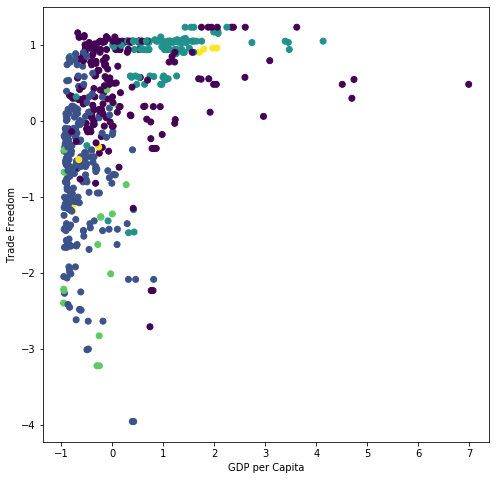

In [75]:
# Looked into plotting multivariate clusters... 
# it's something we would need to understand more closely, but for now, just plotting two variables
_=plt.figure(figsize=(8,8))
_=plt.scatter(X_ss['GDP per Capita (PPP)'], X_ss['Trade Freedom'], c=y_hat)
_=plt.xlabel('GDP per Capita')
_=plt.ylabel('Trade Freedom')

We can see that the clusters are of very different sizes... still a bit of a mess. We might like to do some level of feature selection (the individual freedom scores must be based on the other inputs at the far right of the dataframe). That may or may not help. In any case, it'll be good to look into visualization of multivariate clusters!